In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)


import warnings
warnings.filterwarnings("ignore")

color = sns.color_palette()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df           = pd.read_csv("./afterCleaning/backFill_df.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                   
                                                   "indext":str},low_memory=False)


In [3]:
df.shape

(4000000, 45)

In [4]:
df.columns

Index(['fecha_dato', 'CustomerCode', 'EmployeeIndex', 'CustomerRresidence',
       'sexe', 'age', 'FirstContractDate', 'ind_nuevo', 'seniority', 'indrel',
       'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada',
       'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente',
       'GrossIncome', 'segmentation', 'P_SavingAccount', 'P_Garantees',
       'P_CurrentAccounts', 'P_Derivada_Account ', 'P_PayrollAccount',
       'P_JuniorAccount', 'P_MásParticularAccount', 'P_ParticularAccount',
       'P_ParticularPlusAccount', 'P_ShortTermDeposits',
       'P_MeduimTermDeposits', 'P_LongTermDeposits', 'P_eAccount', 'P_Funds',
       'P_Mortgage', 'P_Pensions', 'P_Loans', 'P_Taxes', 'P_CreditCard',
       'P_securities', 'P_HomeAccount', 'P_Payroll', 'P_DirectDebit'],
      dtype='object')

### Employee Status
Employee index: A active, B ex employed, F filial, N not employee, P pasiv

Number of unique values in Employee Status :  5


Text(0, 0.5, 'Number of Employees')

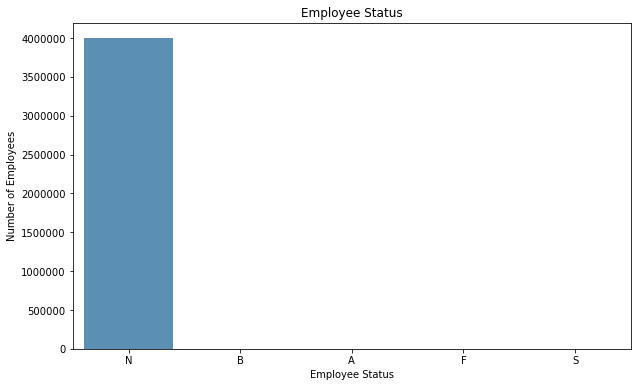

In [5]:
EmployeeIndex = df.EmployeeIndex.value_counts()
len_unique = len(EmployeeIndex)
print("Number of unique values in Employee Status : ",len_unique)
plt.figure(figsize=(10,6))
plt.ticklabel_format(style = 'plain')
sns.barplot(EmployeeIndex.index, EmployeeIndex.values, alpha=0.8, color=color[0])
plt.title('Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Number of Employees')

__ Il semble qu'il y ait des employés avec un statut autre que 'N' mais cela ne s'affiche pas. Essayons de prendre le journal de comptage.

Number of unique values in Employee Status :  5


Text(0, 0.5, 'Number of Employees-Log')

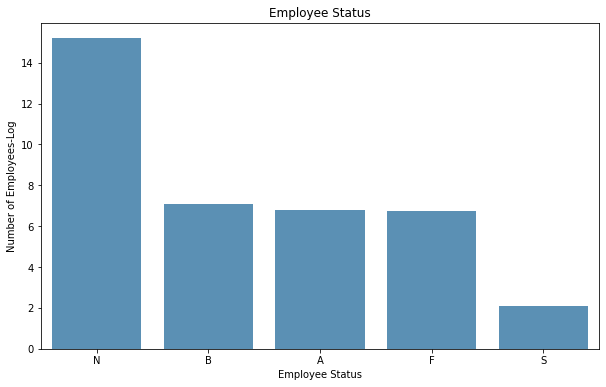

In [6]:
print("Number of unique values in Employee Status : ",len_unique)
plt.figure(figsize=(10,6))
sns.barplot(EmployeeIndex.index, np.log1p(EmployeeIndex.values), alpha=0.8, color=color[0])
plt.title('Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Number of Employees-Log')

### Customer Country

Number of unique values in Cusotmer Country :  114


Text(0, 0.5, 'Number of Employees')

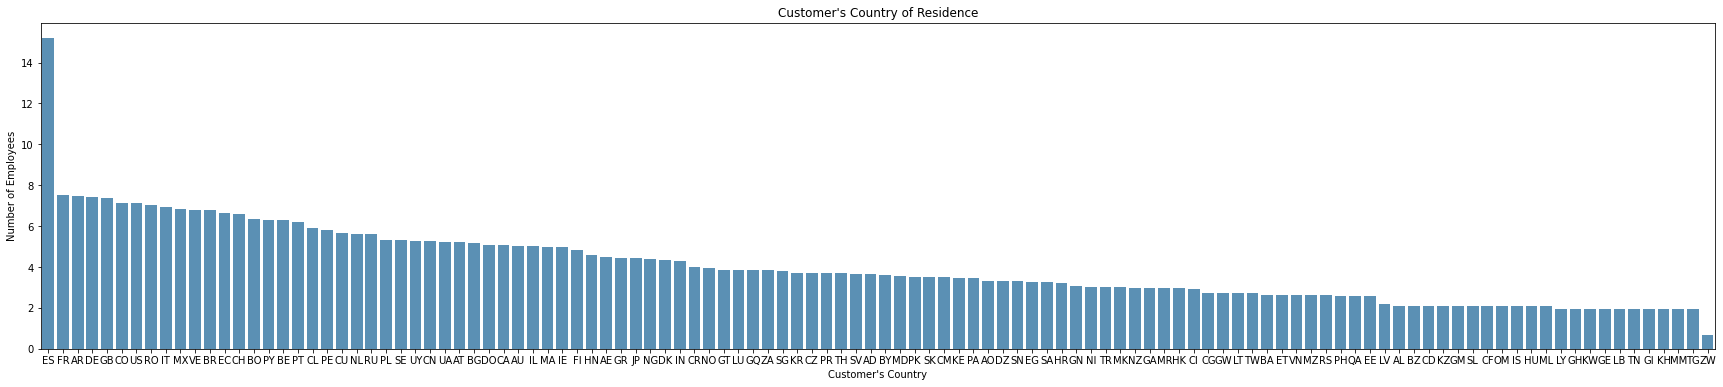

In [7]:
CustomerRresidence = df['CustomerRresidence'].value_counts()
len_unique = len(CustomerRresidence)
print("Number of unique values in Cusotmer Country : ",len_unique)

plt.figure(figsize=(30,6))
sns.barplot(CustomerRresidence.index, np.log1p(CustomerRresidence.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Country of Residence')
plt.xlabel('Customer\'s Country')
plt.ylabel('Number of Employees')

### Customer's Sex


Number of unique values in Customer Sex :  2


Text(0, 0.5, 'Number of Employees')

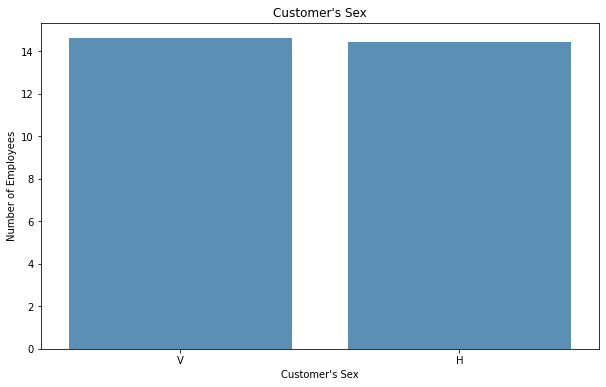

In [8]:
sexe = df['sexe'].value_counts()
len_unique = len(sexe)
print("Number of unique values in Customer Sex : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(sexe.index, np.log1p(sexe.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Sex')
plt.xlabel('Customer\'s Sex')
plt.ylabel('Number of Employees')

### Customer's Age

### Customer's Join Dates
#### Join Months

### Target Variables
#### Popular Product

In [9]:
df.columns[22:]

Index(['P_SavingAccount', 'P_Garantees', 'P_CurrentAccounts',
       'P_Derivada_Account ', 'P_PayrollAccount', 'P_JuniorAccount',
       'P_MásParticularAccount', 'P_ParticularAccount',
       'P_ParticularPlusAccount', 'P_ShortTermDeposits',
       'P_MeduimTermDeposits', 'P_LongTermDeposits', 'P_eAccount', 'P_Funds',
       'P_Mortgage', 'P_Pensions', 'P_Loans', 'P_Taxes', 'P_CreditCard',
       'P_securities', 'P_HomeAccount', 'P_Payroll', 'P_DirectDebit'],
      dtype='object')

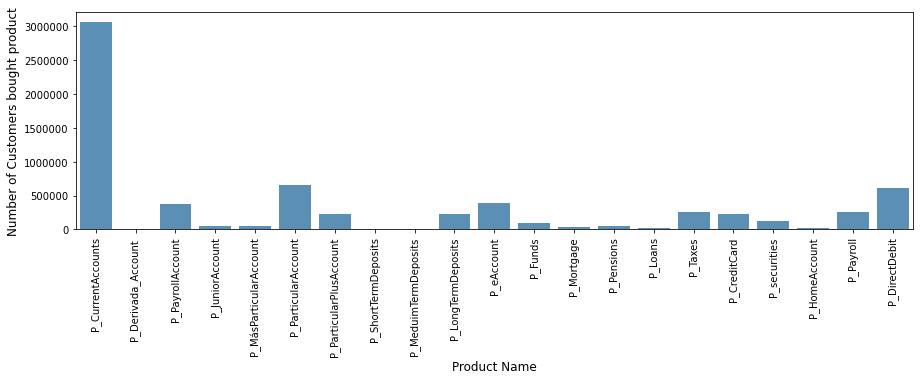

In [10]:
target_variables = list(df.columns[24:])
target_counts = df[target_variables].astype('float64').sum(axis=0)
plt.figure(figsize=(15,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color=color[0])
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Customers bought product', fontsize=12)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(rotation='vertical')
plt.show()

#### Popularity of products by Sex and Activity Index

#### Popularity of products by Sex and Activity Index Activity index (1, active customer; 0, inactive customer)

In [11]:
df_a = df.loc[:, ['sexe', 'ind_actividad_cliente']].join(df.loc[:, "P_SavingAccount": "P_DirectDebit"])
df_a = df_a.groupby(['sexe', 'ind_actividad_cliente']).sum()
df_a = df_a.T
df_a.head(24)

sexe                            H                   V          
ind_actividad_cliente         0.0       1.0       0.0       1.0
P_SavingAccount              51.0      86.0     100.0     301.0
P_Garantees                   0.0      35.0       0.0      94.0
P_CurrentAccounts        747674.0  669426.0  723718.0  918862.0
P_Derivada_Account           45.0     242.0     146.0    1539.0
P_PayrollAccount           2654.0  151632.0    3378.0  223141.0
P_JuniorAccount            4350.0   19727.0    5144.0   20708.0
P_MásParticularAccount     4751.0   16060.0    7768.0   23033.0
P_ParticularAccount       80297.0  166427.0  130579.0  277945.0
P_ParticularPlusAccount   16876.0   73394.0   25200.0  116750.0
P_ShortTermDeposits        1047.0    4167.0    1496.0    5849.0
P_MeduimTermDeposits         14.0    4045.0      62.0    5684.0
P_LongTermDeposits         1043.0   87977.0    1631.0  132827.0
P_eAccount                10414.0  139101.0   18100.0  222188.0
P_Funds                     344.0   27335.0     617.0   62783.0
P_Mortgage                   65.0    8586.0     154.0   21604.0
P_Pensions                  134.0   16721.0     248.0   28408.0
P_Loans                    1080.0    3730.0    2071.0    8281.0
P_Taxes                    5869.0   81855.0   13806.0  149237.0
P_CreditCard               1105.0   76176.0    1757.0  144996.0
P_securities                496.0   35404.0    1129.0   87801.0
P_HomeAccount              1634.0    5878.0    2738.0    9672.0
P_Payroll                   736.0  107119.0     960.0  153957.0
P_DirectDebit              2693.0  234638.0    4050.0  365006.0

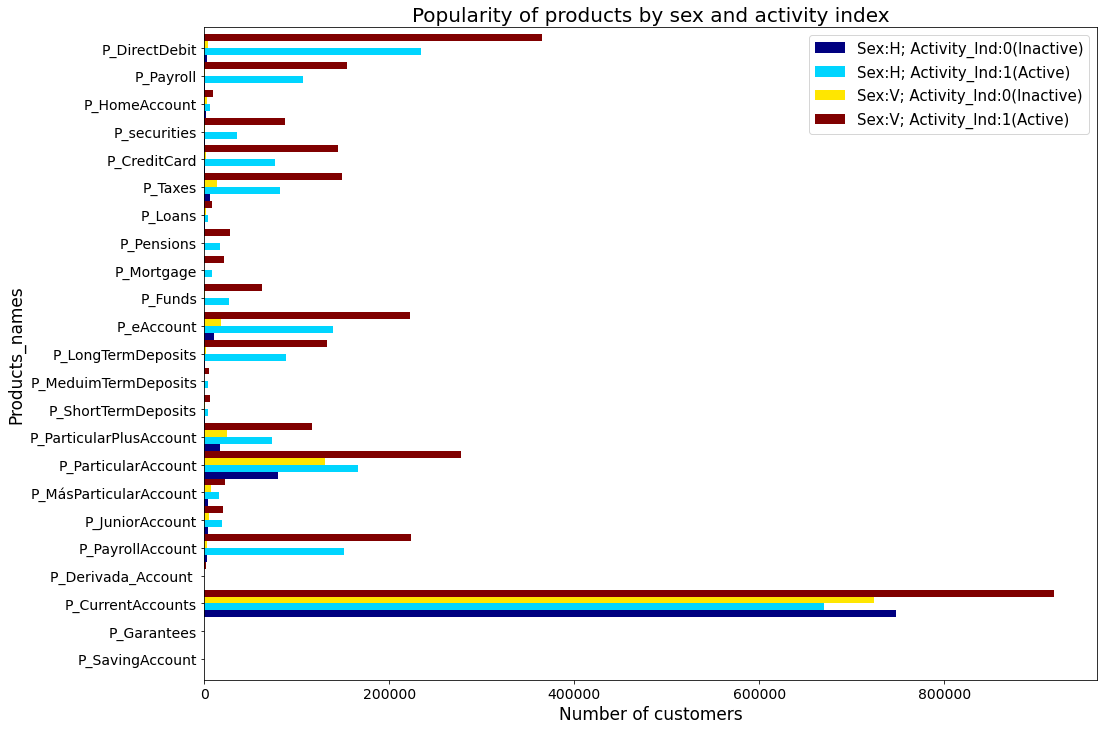

In [12]:
df_a.plot(kind='barh', fontsize=14, figsize=[16,12], colormap='jet', width=1)
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0(Inactive)", "Sex:H; Activity_Ind:1(Active)", "Sex:V; Activity_Ind:0(Inactive)", 
            "Sex:V; Activity_Ind:1(Active)"], prop={'size':15}) 

In [13]:
exclude = ['P_CurrentAccounts']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

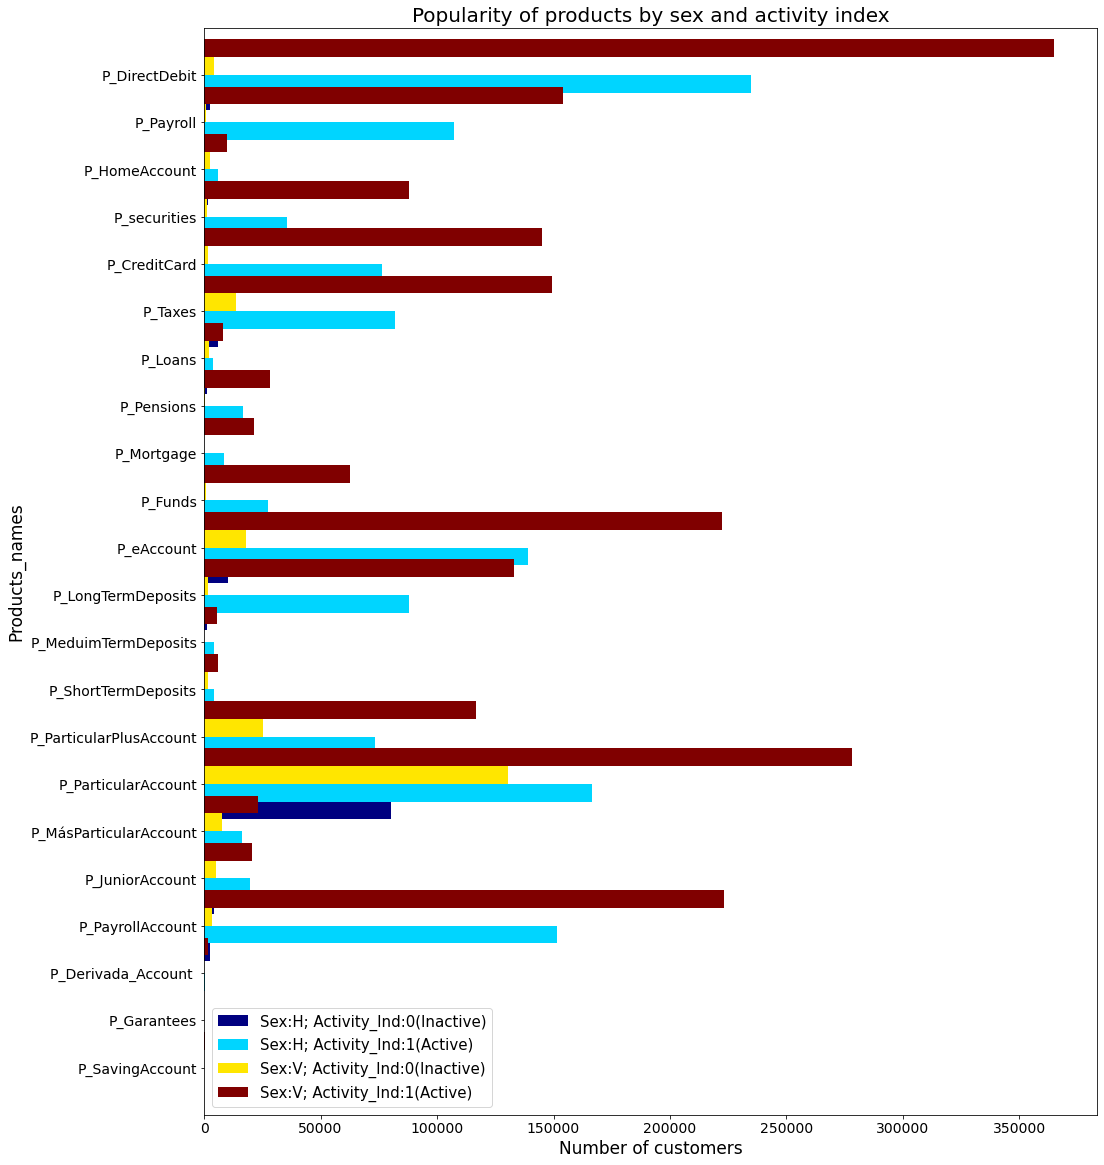

In [14]:
df_a.plot(kind='barh', fontsize=14, figsize=[16,20], colormap='jet', width=1.5)
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0(Inactive)", "Sex:H; Activity_Ind:1(Active)", "Sex:V; Activity_Ind:0(Inactive)", 
            "Sex:V; Activity_Ind:1(Active)"], prop={'size':15}) 

Comprenons combien de clients détiennent des garanties et des comptes d'épargne en excluant tous les autres comptes

In [15]:
tmp = df.head()

In [16]:
df_a

sexe                           H                   V          
ind_actividad_cliente        0.0       1.0       0.0       1.0
P_SavingAccount             51.0      86.0     100.0     301.0
P_Garantees                  0.0      35.0       0.0      94.0
P_Derivada_Account          45.0     242.0     146.0    1539.0
P_PayrollAccount          2654.0  151632.0    3378.0  223141.0
P_JuniorAccount           4350.0   19727.0    5144.0   20708.0
P_MásParticularAccount    4751.0   16060.0    7768.0   23033.0
P_ParticularAccount      80297.0  166427.0  130579.0  277945.0
P_ParticularPlusAccount  16876.0   73394.0   25200.0  116750.0
P_ShortTermDeposits       1047.0    4167.0    1496.0    5849.0
P_MeduimTermDeposits        14.0    4045.0      62.0    5684.0
P_LongTermDeposits        1043.0   87977.0    1631.0  132827.0
P_eAccount               10414.0  139101.0   18100.0  222188.0
P_Funds                    344.0   27335.0     617.0   62783.0
P_Mortgage                  65.0    8586.0     154.0   21604.0
P_Pensions                 134.0   16721.0     248.0   28408.0
P_Loans                   1080.0    3730.0    2071.0    8281.0
P_Taxes                   5869.0   81855.0   13806.0  149237.0
P_CreditCard              1105.0   76176.0    1757.0  144996.0
P_securities               496.0   35404.0    1129.0   87801.0
P_HomeAccount             1634.0    5878.0    2738.0    9672.0
P_Payroll                  736.0  107119.0     960.0  153957.0
P_DirectDebit             2693.0  234638.0    4050.0  365006.0

#### Popularity of products by household income

In [17]:
df_a = df.groupby(pd.cut(df['GrossIncome'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum()
df_a.loc[:, "P_SavingAccount": "P_DirectDebit"].head()

,P_SavingAccount,P_Garantees,P_CurrentAccounts,P_Derivada_Account,P_PayrollAccount,P_JuniorAccount,P_MásParticularAccount,P_ParticularAccount,P_ParticularPlusAccount,P_ShortTermDeposits,...,P_Funds,P_Mortgage,P_Pensions,P_Loans,P_Taxes,P_CreditCard,P_securities,P_HomeAccount,P_Payroll,P_DirectDebit
GrossIncome,,,,,,,,,,,,,,,,,,,,,
"[0.0, 60000.0)",56,6,575059,267,49502,4527,7402,73303,24134,2009,...,7683,3581,3566,3776,27555,22870,10877,1817,33239.0,84639
"[60000.0, 120000.0)",123,30,1328920,651,150315,18143,21648,245028,88276,5593,...,30499,12377,13900,6924,90037,82401,41133,6850,103480.0,243945
"[120000.0, 180000.0)",155,23,619292,489,93042,13921,11844,165678,58945,2905,...,23700,7513,12154,2500,61601,58488,31822,5163,65848.0,142833
"[180000.0, 240000.0)",102,46,266811,292,45190,7087,5782,84255,30061,1118,...,13352,3665,7329,923,33203,30081,18993,2794,31821.0,67560
"[240000.0, inf)",102,24,269598,273,42756,6251,4936,86984,30804,934,...,15845,3273,8562,1039,38371,30194,22005,3298,28384.0,67410


In [18]:
df_a = df_a

df_a=df_a.loc[:,"P_SavingAccount": "P_DirectDebit"].T


In [19]:
df_a.head()

GrossIncome,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
P_SavingAccount,56.0,123.0,155.0,102.0,102.0
P_Garantees,6.0,30.0,23.0,46.0,24.0
P_CurrentAccounts,575059.0,1328920.0,619292.0,266811.0,269598.0
P_Derivada_Account,267.0,651.0,489.0,292.0,273.0
P_PayrollAccount,49502.0,150315.0,93042.0,45190.0,42756.0


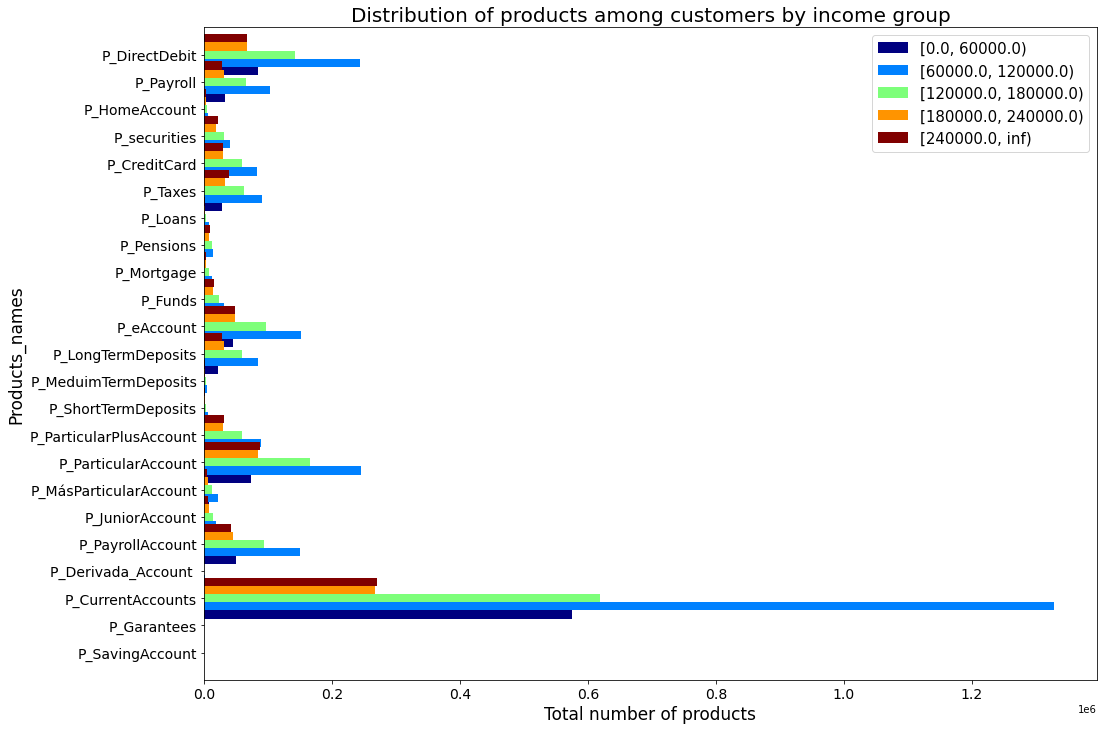

In [20]:
# Plot of product share for each income group
df_a.plot(kind='barh', fontsize=14, figsize=[16,12], colormap='jet', width=1.5)
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

#### Popularity of products by different Age group

In [21]:
#change datatype
df["age"]   = pd.to_numeric(df["age"], errors="coerce") 

In [22]:
df_a = df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum()
df_a=df_a.loc[:,"P_SavingAccount": "P_DirectDebit"].T
df_a.head(23)

age,"[0.0, 20.0)","[20.0, 40.0)","[40.0, 60.0)","[60.0, 80.0)","[80.0, 100.0)","[100.0, inf)"
P_SavingAccount,0.0,18.0,482.0,38.0,0.0,0.0
P_Garantees,0.0,37.0,86.0,6.0,0.0,0.0
P_CurrentAccounts,80.0,1692887.0,985076.0,298787.0,73166.0,2246.0
P_Derivada_Account,0.0,237.0,1297.0,371.0,63.0,0.0
P_PayrollAccount,0.0,122427.0,218755.0,34335.0,4646.0,38.0
P_JuniorAccount,48424.0,1257.0,0.0,0.0,0.0,0.0
P_MásParticularAccount,1.0,17688.0,25406.0,6725.0,1302.0,5.0
P_ParticularAccount,6.0,74199.0,388215.0,139557.0,49813.0,2225.0
P_ParticularPlusAccount,0.0,42852.0,148479.0,33692.0,6712.0,132.0
P_ShortTermDeposits,0.0,3674.0,6405.0,1654.0,384.0,0.0


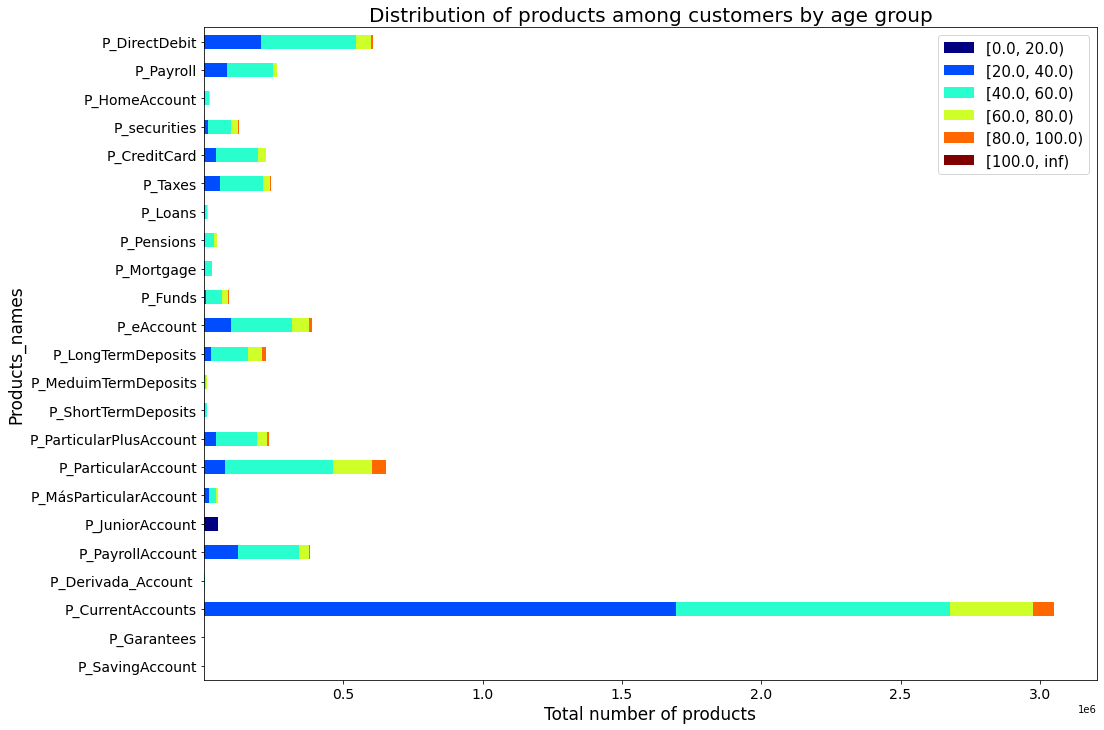

In [23]:
# Plot of product share for each age group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='jet')
plt.title('Distribution of products among customers by age group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

#### Popularity of products by different channels used to join

In [24]:
df["canal_entrada"].value_counts().head(5)

KHE    1302010
KAT    1058677
KFC     969310
KFA     140566
KHK      58229
Name: canal_entrada, dtype: int64

In [25]:
#to better visualize we will use the top 5 channels to plot
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:,"P_SavingAccount": "P_DirectDebit"])
interested_channels = ['KHE', 'KAT', 'KFC', 'KFA', 'KHK']
df_a = df_a[df_a.canal_entrada.isin(interested_channels)]
df_a = df_a.groupby(['canal_entrada']).sum()
df_a = df_a.T
df_a.head(30)

canal_entrada,KAT,KFA,KFC,KHE,KHK
P_SavingAccount,298.0,21.0,106.0,0.0,0.0
P_Garantees,57.0,0.0,53.0,0.0,0.0
P_CurrentAccounts,691191.0,87187.0,653014.0,1266103.0,46150.0
P_Derivada_Account,802.0,61.0,829.0,6.0,10.0
P_PayrollAccount,163621.0,19645.0,124202.0,21683.0,5148.0
P_JuniorAccount,16269.0,5238.0,27994.0,12.0,1.0
P_MásParticularAccount,12710.0,4013.0,23450.0,156.0,2525.0
P_ParticularAccount,295632.0,29063.0,215030.0,3.0,5.0
P_ParticularPlusAccount,105529.0,14441.0,69724.0,2.0,0.0
P_ShortTermDeposits,2018.0,271.0,1296.0,63.0,6087.0


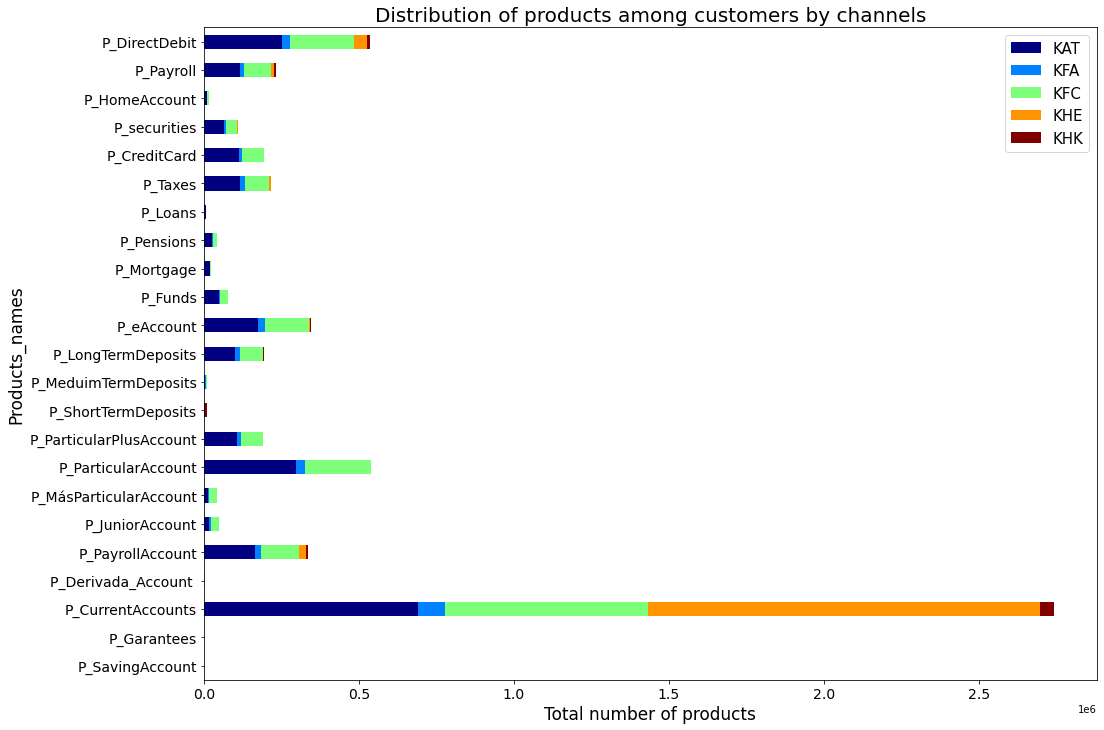

In [26]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='jet')
plt.title('Distribution of products among customers by channels', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [27]:
import pandas as pd
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
print(app_dataset)

   Gender_Female  Gender_Male  Age              App
0              1            0   15       Atom Count
1              1            0   25  Check Mate Mate
2              0            1   32   Beehive Finder
3              1            0   35  Check Mate Mate
4              0            1   12       Atom Count
5              0            1   14       Atom Count


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 45 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   fecha_dato               object 
 1   CustomerCode             int64  
 2   EmployeeIndex            object 
 3   CustomerRresidence       object 
 4   sexe                     object 
 5   age                      float64
 6   FirstContractDate        object 
 7   ind_nuevo                object 
 8   seniority                object 
 9   indrel                   float64
 10  indrel_1mes              object 
 11  tiprel_1mes              object 
 12  indresi                  object 
 13  indext                   object 
 14  canal_entrada            object 
 15  indfall                  object 
 16  tipodom                  float64
 17  cod_prov                 float64
 18  nomprov                  object 
 19  ind_actividad_cliente    float64
 20  GrossIncome              float64
 21  segmenta

In [29]:
df.columns

Index(['fecha_dato', 'CustomerCode', 'EmployeeIndex', 'CustomerRresidence',
       'sexe', 'age', 'FirstContractDate', 'ind_nuevo', 'seniority', 'indrel',
       'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada',
       'indfall', 'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente',
       'GrossIncome', 'segmentation', 'P_SavingAccount', 'P_Garantees',
       'P_CurrentAccounts', 'P_Derivada_Account ', 'P_PayrollAccount',
       'P_JuniorAccount', 'P_MásParticularAccount', 'P_ParticularAccount',
       'P_ParticularPlusAccount', 'P_ShortTermDeposits',
       'P_MeduimTermDeposits', 'P_LongTermDeposits', 'P_eAccount', 'P_Funds',
       'P_Mortgage', 'P_Pensions', 'P_Loans', 'P_Taxes', 'P_CreditCard',
       'P_securities', 'P_HomeAccount', 'P_Payroll', 'P_DirectDebit'],
      dtype='object')

In [126]:
X = df.loc[:,['fecha_dato', 'EmployeeIndex', 'CustomerRresidence',
       'sexe', 'age', 'FirstContractDate', 'ind_nuevo', 
         'canal_entrada',
       'indfall', 'cod_prov', 'ind_actividad_cliente',
       'GrossIncome', 'segmentation', ]]

In [127]:
X.head()

,fecha_dato,EmployeeIndex,CustomerRresidence,sexe,age,FirstContractDate,ind_nuevo,canal_entrada,indfall,cod_prov,ind_actividad_cliente,GrossIncome,segmentation
0,2015-01-28,N,ES,H,35.0,2015-01-12,0,KHL,N,29.0,1.0,87218.10,02 - PARTICULARES
1,2015-01-28,N,ES,V,23.0,2012-08-10,0,KHE,N,13.0,0.0,35548.74,03 - UNIVERSITARIO
2,2015-01-28,N,ES,V,23.0,2012-08-10,0,KHE,N,13.0,0.0,122179.11,03 - UNIVERSITARIO
3,2015-01-28,N,ES,H,22.0,2012-08-10,0,KHD,N,50.0,0.0,119775.54,03 - UNIVERSITARIO
4,2015-01-28,N,ES,V,23.0,2012-08-10,0,KHE,N,50.0,1.0,22220.04,03 - UNIVERSITARIO


In [128]:
# Y = df.loc[:,['P_Garantees',
#        'P_CurrentAccounts', 'P_Derivada_Account ', 'P_PayrollAccount',
#        'P_JuniorAccount', 'P_MásParticularAccount', 'P_ParticularAccount',
#        'P_ParticularPlusAccount', 'P_ShortTermDeposits',
#        'P_MeduimTermDeposits', 'P_LongTermDeposits', 'P_eAccount', 'P_Funds',
#        'P_Mortgage', 'P_Pensions', 'P_Loans', 'P_Taxes', 'P_CreditCard',
#        'P_securities', 'P_HomeAccount', 'P_Payroll', 'P_DirectDebit']]
Y = df.loc[:,['P_Garantees', 'P_Derivada_Account ', 'P_PayrollAccount',
       'P_JuniorAccount', 'P_MásParticularAccount', 'P_ParticularAccount',
       'P_ParticularPlusAccount', 'P_ShortTermDeposits',
       'P_MeduimTermDeposits', 'P_LongTermDeposits', 'P_eAccount', 'P_Funds',
       'P_Mortgage', 'P_Pensions', 'P_Loans', 'P_Taxes', 'P_CreditCard',
       'P_securities', 'P_HomeAccount', 'P_Payroll', 'P_DirectDebit']]


In [129]:
Y.head()

,P_Garantees,P_Derivada_Account,P_PayrollAccount,P_JuniorAccount,P_MásParticularAccount,P_ParticularAccount,P_ParticularPlusAccount,P_ShortTermDeposits,P_MeduimTermDeposits,P_LongTermDeposits,...,P_Funds,P_Mortgage,P_Pensions,P_Loans,P_Taxes,P_CreditCard,P_securities,P_HomeAccount,P_Payroll,P_DirectDebit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [131]:
X_train.shape, X_test.shape

((2680000, 13), (1320000, 13))

In [132]:
import category_encoders as ce
# from sklearn.preprocessing import CategoricalEncoder

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
X.dtypes

fecha_dato                object
EmployeeIndex             object
CustomerRresidence        object
sexe                      object
age                      float64
FirstContractDate         object
ind_nuevo                 object
canal_entrada             object
indfall                   object
cod_prov                 float64
ind_actividad_cliente    float64
GrossIncome              float64
segmentation              object
dtype: object

In [145]:
encoder = ce.OrdinalEncoder(cols=[ 'EmployeeIndex', 'FirstContractDate','ind_nuevo',
                                  'sexe','fecha_dato' ,'canal_entrada','CustomerRresidence' ,'ind_nuevo','indfall'   ,'segmentation'
       ])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [146]:
X_train.head(),X_test.head()

(         fecha_dato  EmployeeIndex  CustomerRresidence  sexe   age  \
 3577337           1              1                   1     1  63.0   
 2921998           2              1                   1     1  58.0   
 2440781           3              1                   1     2  38.0   
 1123930           4              1                   1     2  45.0   
 1263431           5              1                   1     2  70.0   
 
          FirstContractDate  ind_nuevo  canal_entrada  indfall  cod_prov  \
 3577337                  1       -1.0              1        1       8.0   
 2921998                  2       -1.0              1        1      28.0   
 2440781                  3       -1.0              2        1      46.0   
 1123930                  4       -1.0              1        1      28.0   
 1263431                  5       -1.0              2        1      28.0   
 
          ind_actividad_cliente  GrossIncome  segmentation  
 3577337                    1.0    194418.75         

In [147]:
X_train.isnull().values.any()

False

In [148]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))

In [149]:
 perc_missing(X_train)

In [150]:
 perc_missing(X_test)

In [151]:
def backFill(backFill_df):  
    for col in backFill_df.columns:
        pct = backFill_df[col].isna().mean() * 100
        if (pct != 0):
            backFill_df[col].bfill(inplace=True)
    
backFill(X_train)
backFill(X_test)

In [152]:
 perc_missing(X_train)


In [153]:
perc_missing(X_test)

In [154]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [155]:
y_pred_gini = clf_gini.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8621


In [157]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9998


In [159]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9998
Test set score: 0.8621


In [160]:
X_test.iloc[[1000]]

,fecha_dato,EmployeeIndex,CustomerRresidence,sexe,age,FirstContractDate,ind_nuevo,canal_entrada,indfall,cod_prov,ind_actividad_cliente,GrossIncome,segmentation
2472931,3,1,1,1,30.0,482.0,-1.0,3,1,41.0,0.0,58613.55,3


In [165]:
y_test.iloc[[190]],

(         P_Garantees  P_Derivada_Account   P_PayrollAccount  P_JuniorAccount  \
 1911004            0                    0                 0                0   
 
          P_MásParticularAccount  P_ParticularAccount  P_ParticularPlusAccount  \
 1911004                       0                    0                        0   
 
          P_ShortTermDeposits  P_MeduimTermDeposits  P_LongTermDeposits  ...  \
 1911004                    0                     0                   1  ...   
 
          P_Funds  P_Mortgage  P_Pensions  P_Loans  P_Taxes  P_CreditCard  \
 1911004        0           0           0        0        0             0   
 
          P_securities  P_HomeAccount  P_Payroll  P_DirectDebit  
 1911004             0              0        0.0              0  
 
 [1 rows x 21 columns],)

In [166]:
clf_gini.predict(X_test.iloc[[190]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [167]:
# plt.figure(figsize=(12,8))

# from sklearn import tree

# tree.plot_tree(clf_gini.fit(X_train, y_train)) 

KeyboardInterrupt: 

<Figure size 864x576 with 0 Axes>

In [58]:
# import graphviz 
# dot_data = tree.export_graphviz(clf_gini, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 

# graph 